In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import truvari
import joblib
import glob
import os
from IPython.display import display, Markdown

ref_order = ["hg19", "grch38", "chm13"]
sb.set()

In [6]:
data["intra_merge"].value_c

Index(['svtype', 'svlen', 'szbin', 'GT', 'SVTYPE', 'SVLEN', 'NumCollapsed',
       'CollapseId', 'AN', 'AC', 'NS', 'AC_Hom', 'AC_Het', 'AC_Hemi', 'AF',
       'MAF', 'HWE', 'ExcHet', 'reference', 'intra_merge', 'inter_merge'],
      dtype='object')

In [3]:
data = joblib.load("../stats/inter_merge_stats.jl")

In [4]:
data.head()

,svtype,svlen,szbin,GT,SVTYPE,SVLEN,NumCollapsed,CollapseId,AN,AC,...,AC_Hom,AC_Het,AC_Hemi,AF,MAF,HWE,ExcHet,reference,intra_merge,inter_merge
0,INS,104,"[100,200)",REF,INS,104,NaN,NaN,72,"(1,)",...,"(0,)","(1,)","(0,)","(0.01388890016824007,)","(0.01388890016824007,)","(1.0,)","(1.0,)",hg19,loose,strict
1,INS,85,"[50,100)",REF,INS,85,NaN,NaN,72,"(1,)",...,"(0,)","(1,)","(0,)","(0.01388890016824007,)","(0.01388890016824007,)","(1.0,)","(1.0,)",hg19,loose,strict
2,INS,85,"[50,100)",REF,INS,85,3.0,20.0,72,"(6,)",...,"(0,)","(6,)","(0,)","(0.08333329856395721,)","(0.08333329856395721,)","(1.0,)","(0.797872006893158,)",hg19,loose,strict
3,INS,58,"[50,100)",REF,INS,58,1.0,21.0,72,"(4,)",...,"(2,)","(2,)","(0,)","(0.05555560067296028,)","(0.05555560067296028,)","(0.08389469981193542,)","(0.9993879795074463,)",hg19,loose,strict
4,INS,116,"[100,200)",REF,INS,116,1.0,23.0,72,"(2,)",...,"(0,)","(2,)","(0,)","(0.02777780033648014,)","(0.02777780033648014,)","(1.0,)","(0.9859150052070618,)",hg19,loose,strict


In [5]:
data["AF"] = data["AF"].apply(lambda x: x[0])
data["HWE"] = data["HWE"].apply(lambda x: x[0])
data["ExcHet"] = data["ExcHet"].apply(lambda x: x[0])

In [3]:
def make_af_plots(m_af_dat, title_extra=""):
    title_extra = f" ({title_extra})" if title_extra else ""
    p = sb.catplot(data=m_af_dat, 
                   x="inter_merge", 
                   hue="reference", 
                   y="count", 
                   col="intra_merge",
                   order=["exact", "strict", "loose"],
                   col_order=["exact", "strict", "loose"],
                   hue_order=["hg19", "grch38", "chm13"],
                   kind="bar")
    p.fig.subplots_adjust(top=0.9) 
    hide = p.fig.suptitle('SV Count by intra/inter sample merge' + title_extra)
    plt.show()
    
    p = sb.catplot(data=m_af_dat, 
                   x="inter_merge", 
                   hue="reference", 
                   y="mean", 
                   col="intra_merge",
                   order=["exact", "strict", "loose"],
                   col_order=["exact", "strict", "loose"],
                   hue_order=["hg19", "grch38", "chm13"],
                   kind="bar")
    p.fig.subplots_adjust(top=0.9) 
    hide = p.fig.suptitle('Mean SV AF by intra/inter sample merge' + title_extra)
    plt.show()
    p = sb.catplot(data=m_af_dat, 
                   x="inter_merge", 
                   hue="reference", 
                   y="50%", 
                   col="intra_merge",
                   order=["exact", "strict", "loose"],
                   col_order=["exact", "strict", "loose"],
                   hue_order=["hg19", "grch38", "chm13"],
                   kind="bar")
    p.fig.subplots_adjust(top=0.9) 
    hide = p.fig.suptitle('Median SV AF by intra/inter sample merge' + title_extra)
    plt.show()

In [4]:
view = data.groupby(["reference", "intra_merge", "inter_merge"])
rows = []
for name, dat in view:
    d = dat["AF"].describe()
    d["reference"] = name[0]
    d["intra_merge"] = name[1]
    d["inter_merge"] = name[2]
    rows.append(d)
af_dat = pd.concat(rows, axis=1).T

view = data[data["AF"] >= 0.05].groupby(["reference", "intra_merge", "inter_merge"])
rows = []
for name, dat in view:
    d = dat["AF"].describe()
    d["reference"] = name[0]
    d["intra_merge"] = name[1]
    d["inter_merge"] = name[2]
    rows.append(d)
af_dat_5pct = pd.concat(rows, axis=1).T


view = data.groupby(["reference", "intra_merge", "inter_merge", "svtype"])
rows = []
for name, dat in view:
    d = dat["AF"].describe()
    d["reference"] = name[0]
    d["intra_merge"] = name[1]
    d["inter_merge"] = name[2]
    d["svtype"] = name[3]
    rows.append(d)
af_dat_byty = pd.concat(rows, axis=1).T

view = data[data["AF"] >= 0.05].groupby(["reference", "intra_merge", "inter_merge", "svtype"])
rows = []
for name, dat in view:
    d = dat["AF"].describe()
    d["reference"] = name[0]
    d["intra_merge"] = name[1]
    d["inter_merge"] = name[2]
    d["svtype"] = name[3]
    rows.append(d)
af_dat_5pct_byty = pd.concat(rows, axis=1).T

NameError: name 'data' is not defined

# Stats on the merges

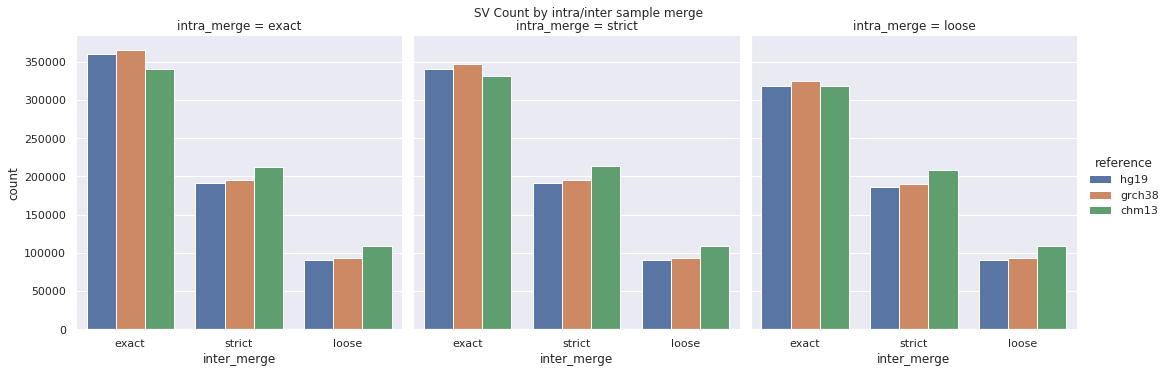

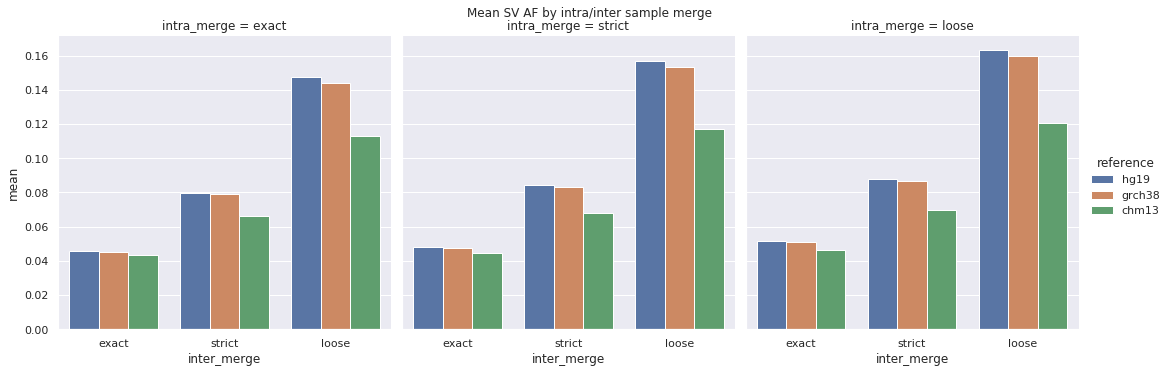

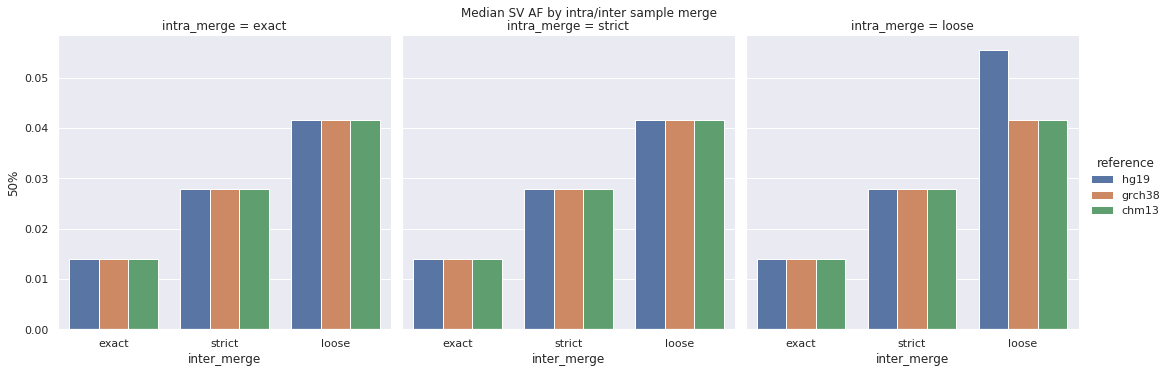

In [17]:
make_af_plots(af_dat)

# Stats on the merges for alleles with AF >= .05

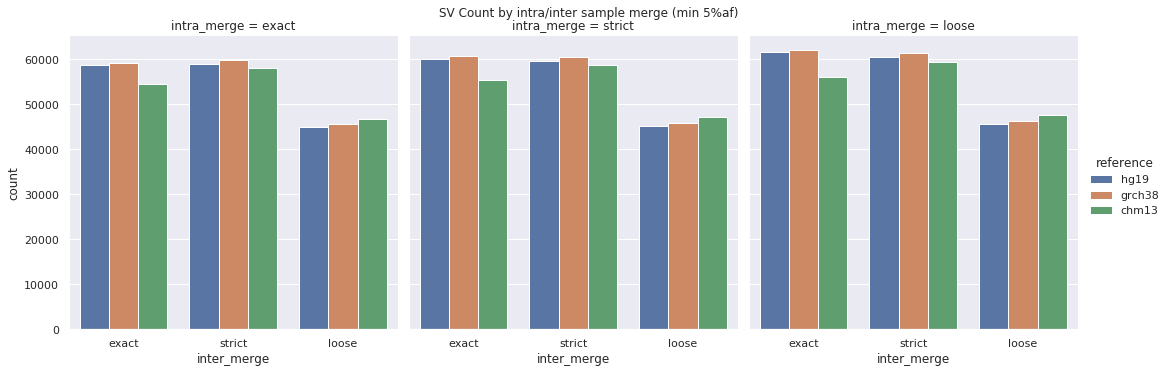

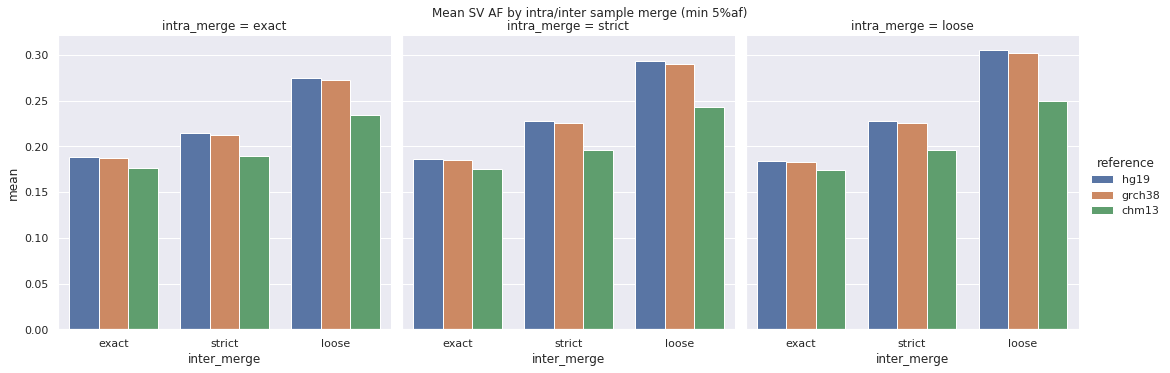

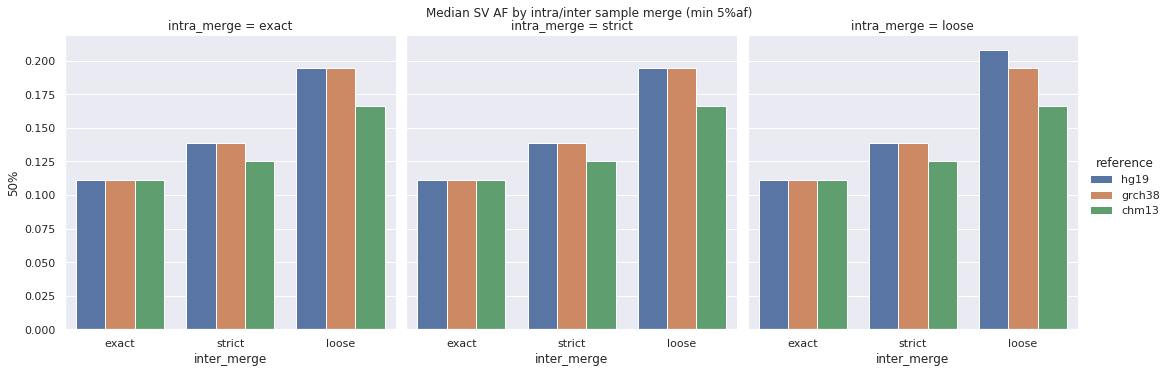

In [13]:
make_af_plots(af_dat_5pct, "min 5%af")

# Stats on the merges by type

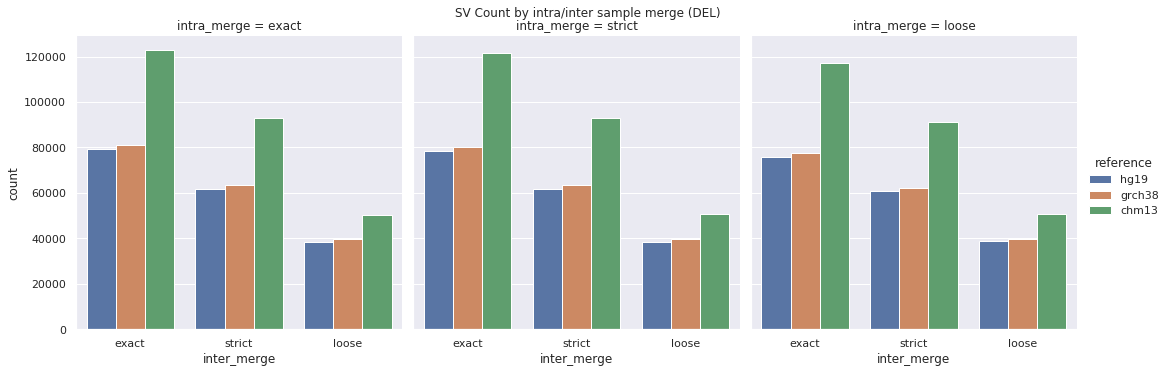

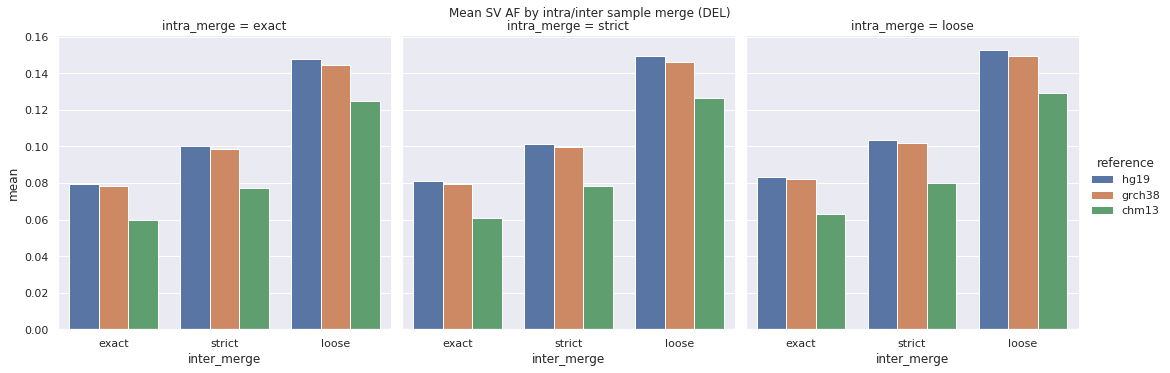

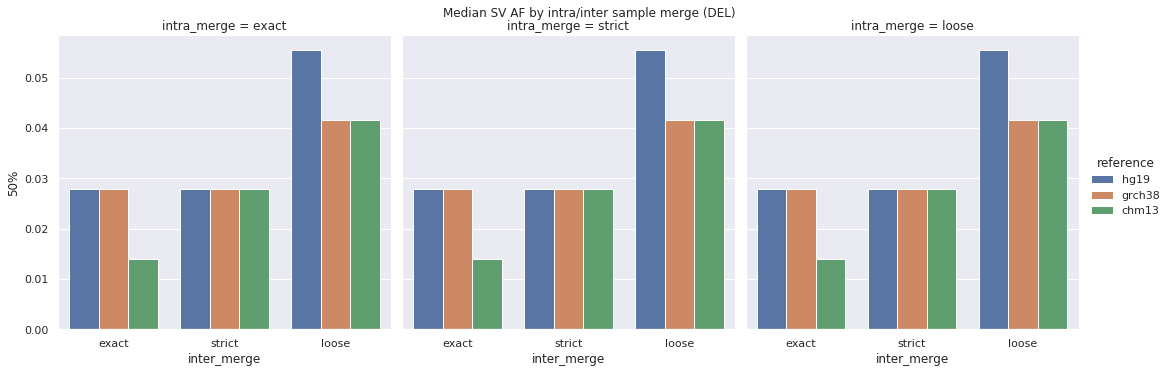

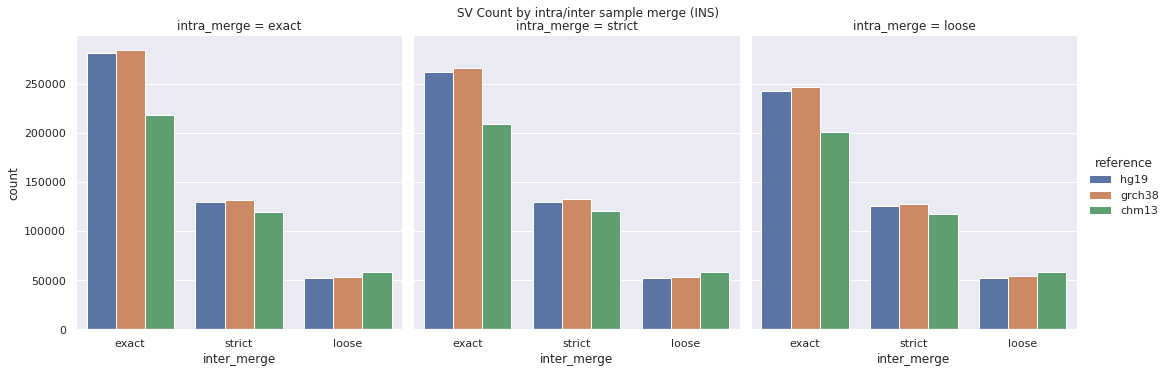

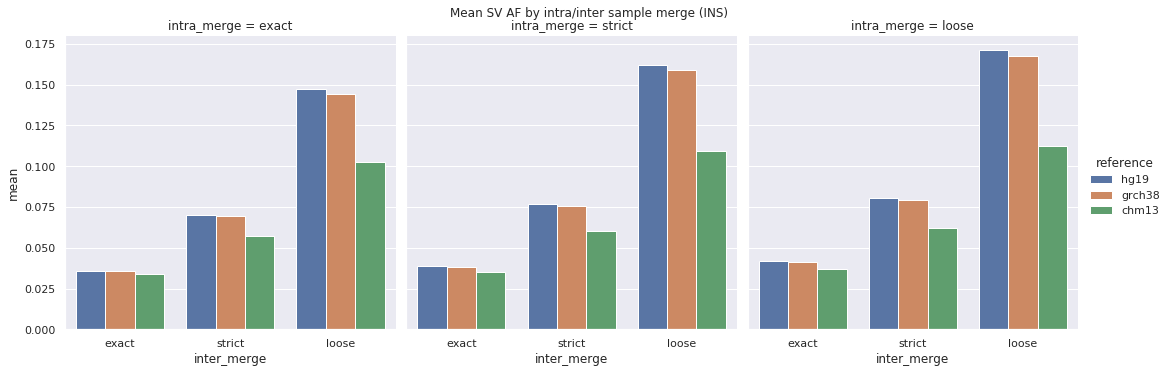

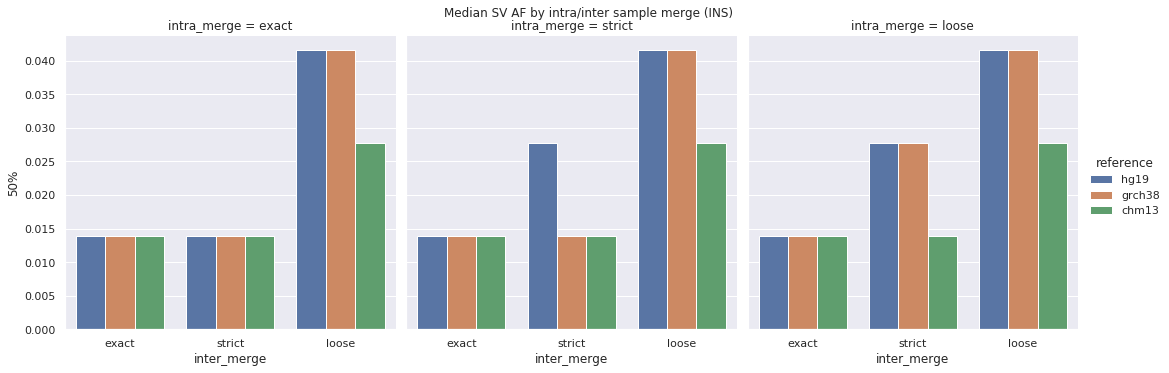

In [19]:
make_af_plots(af_dat_byty[af_dat_byty["svtype"] == "DEL"], "DEL")
make_af_plots(af_dat_byty[af_dat_byty["svtype"] == "INS"], "INS")

# Stats on the merges by type and AF >= .05

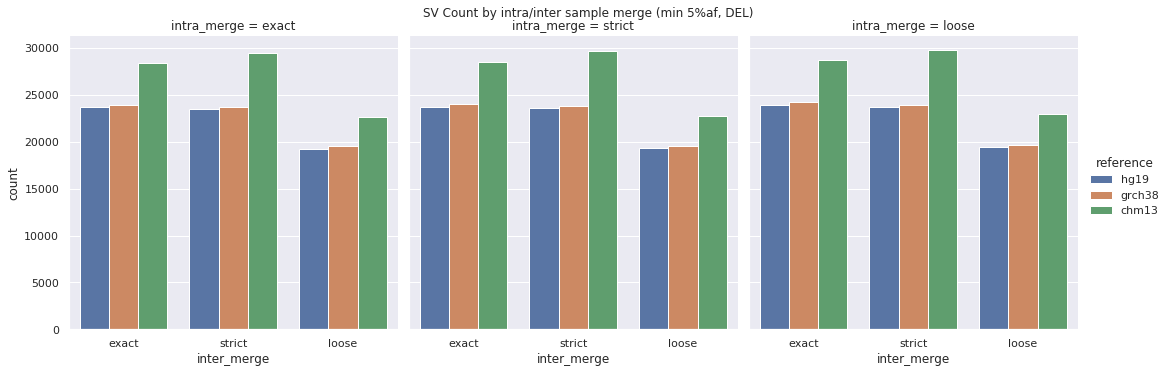

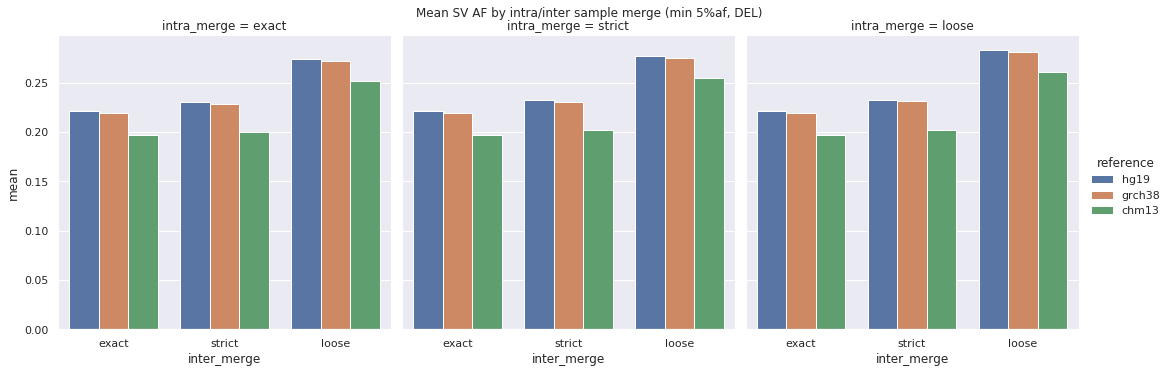

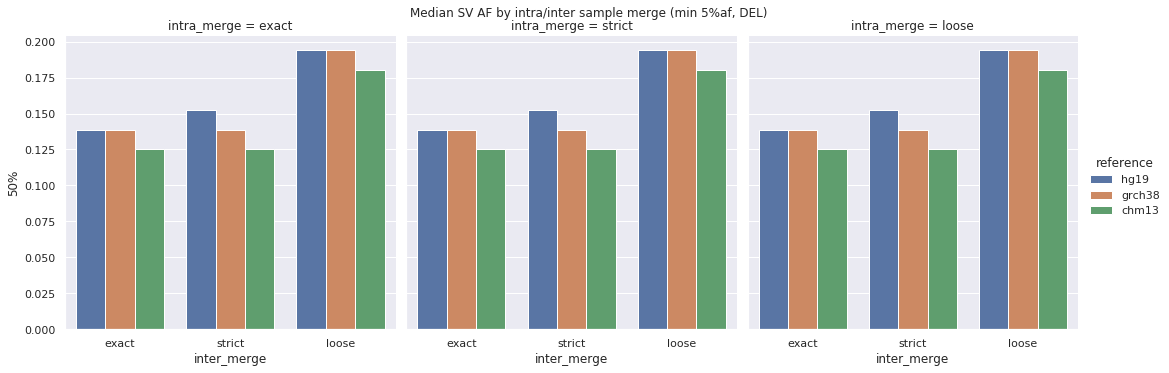

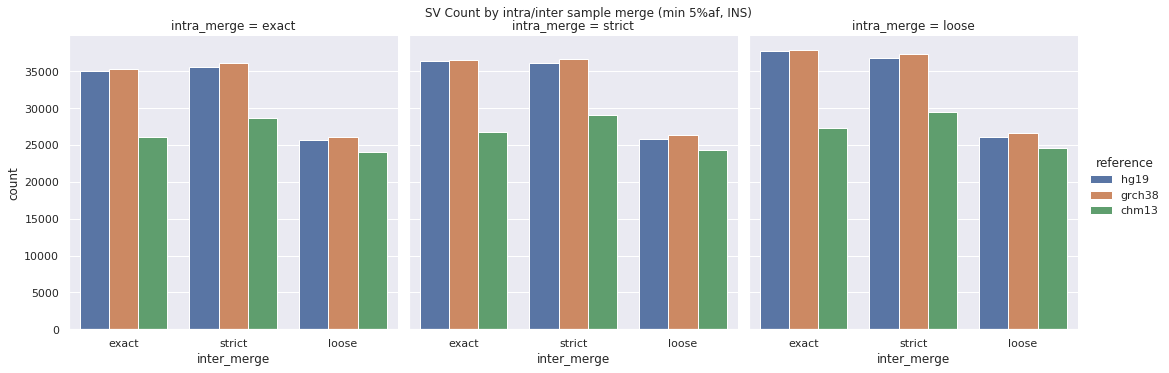

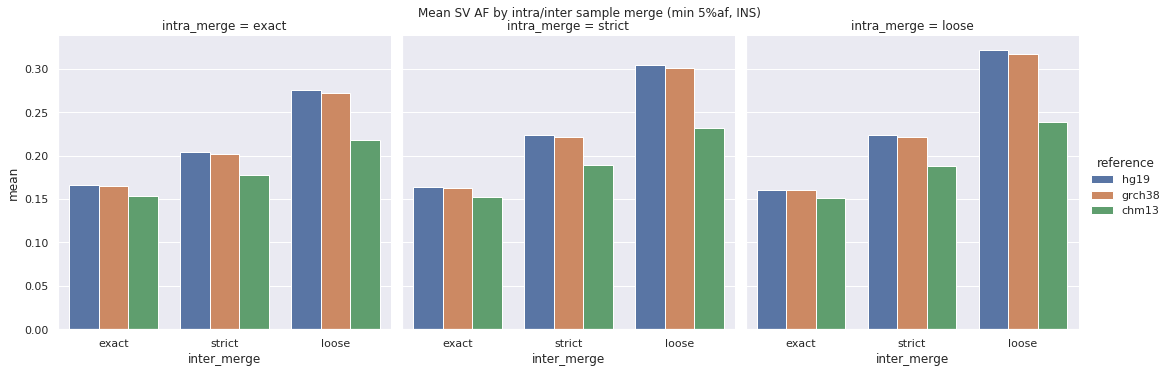

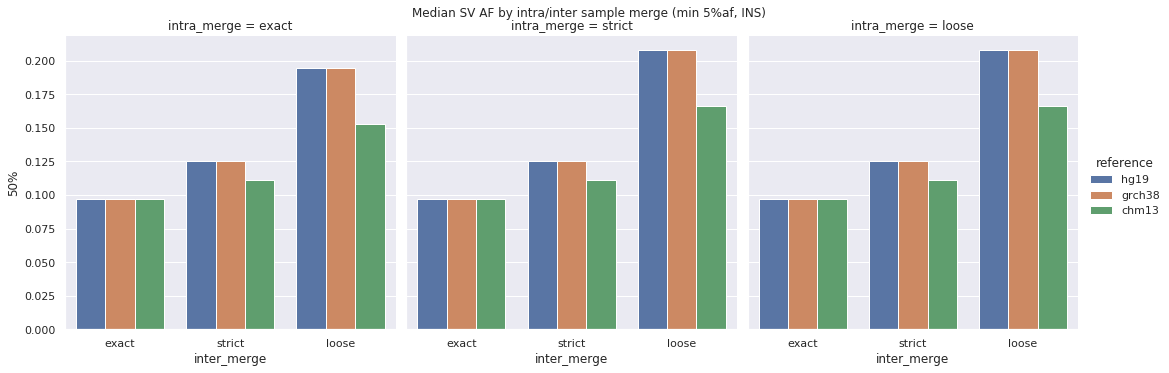

In [20]:
make_af_plots(af_dat_5pct_byty[af_dat_5pct_byty["svtype"] == "DEL"], "min 5%af, DEL")
make_af_plots(af_dat_5pct_byty[af_dat_5pct_byty["svtype"] == "INS"], "min 5%af, INS")